#**MODEL DEPLOYMENT MID EXAM**  
Nama : Sammer Violeta Liu  
NIM : 2702244611

##**Studi Kasus**
1. Buatlah model machine learning yang berisi proses pre-processing machine
learning, training, dan hasil dari perbadingan 2 algoritma machine learning yaitu Random Forest dan
Xgboost. Ambil algoritma terbaik dan simpan dengan menggunakan pickle. Seluruh proses disimpan
dengan extension .ipynb
2. Seluruh proses training dari algoritma machine learning yang terbaik dibubah
dalam format OOP
3. Membuat code inference/prediction untuk proses deployment
4. Lakukan proses deployment dengan menggunakan Streamlit
dan berikan 2 test case pada Streamlit
5. Berikan penjelasan dari semua langkah-langkah yang telah Anda kerjakan
dalam sebuah video.

## **Import Library**

In [1]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
import xgboost as xgb
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')

##**Load Data**

In [3]:
df = pd.read_csv('Dataset_A_loan.csv')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


##**EDA**

*  Menampilkan nama kolom

In [4]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

* Menampilkan tipe data untuk setiap kolom

In [5]:
df.dtypes

,0
person_age,float64
person_gender,object
person_education,object
person_income,float64
person_emp_exp,int64
person_home_ownership,object
loan_amnt,float64
loan_intent,object
loan_int_rate,float64
loan_percent_income,float64


*  Cek duplicated data


In [6]:
df.duplicated().sum()

np.int64(0)

*  Cek missing value di setiap variabel

In [7]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,2250
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [8]:
variables =['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status']

for var in variables:
  percentage_null = df[var].isnull().values.mean()*100
  print(f"{var}: {percentage_null:.2f}%")


person_age: 0.00%
person_gender: 0.00%
person_education: 0.00%
person_income: 5.00%
person_emp_exp: 0.00%
person_home_ownership: 0.00%
loan_amnt: 0.00%
loan_intent: 0.00%
loan_int_rate: 0.00%
loan_percent_income: 0.00%
cb_person_cred_hist_length: 0.00%
credit_score: 0.00%
previous_loan_defaults_on_file: 0.00%
loan_status: 0.00%


Terdapat missing data sebanyak 2250 atau sekitar 5% di variabel person_income. Untuk mengisi missing data di variabel numerik seperti person_income, harus dilakukan pemeriksaan outlier terlebih dahulu. Apabila variabel wip memiliki outlier maka missing data akan diisi dengan nilai median. Sebaliknya, apabila variabel wip tidak memiliki outlier maka missing data akan diisi dengan nilai mean.

* Cek outlier pada variabel person_income

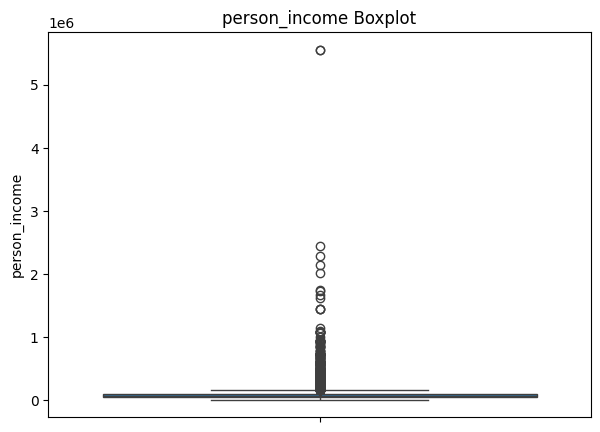

In [9]:
plt.figure(figsize=(7,5))
sns.boxplot(y = df['person_income'])
plt.title("person_income Boxplot")
plt.show()

Terdapat outlier pada variabel person_income sehingga missing data akan diimputasi dengan nilai median.

*  Cek outlier pada semua variable numerik

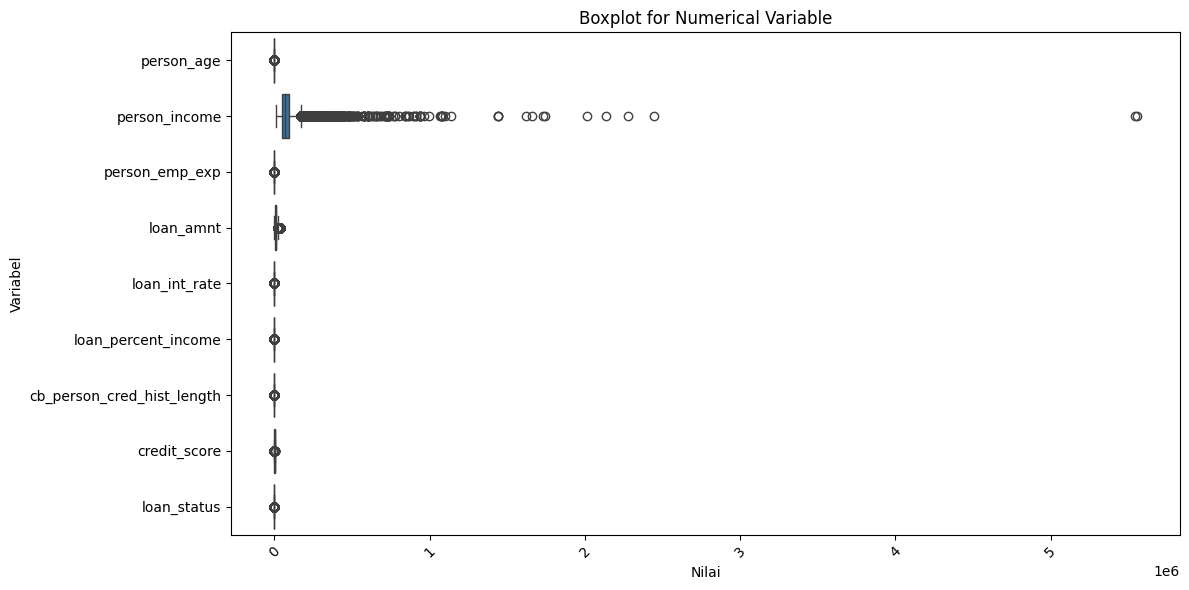

In [10]:
var_num =['person_age', 'person_income','person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']

df_long = df[var_num].melt(var_name='Variabel', value_name='Nilai')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Nilai', y='Variabel', data=df_long)
plt.title('Boxplot for Numerical Variable')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Terdapat outlier di semua variabel. Nantinya outlier ini akan dilakukan winsorization.

* Cek unique value untuk variabel categorical

In [11]:
var_cat =['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
for var in var_cat:
    print(f"{var}: {df[var].unique()}\n")

person_gender: ['female' 'male' 'Male' 'fe male']

person_education: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']

person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']

loan_intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']

previous_loan_defaults_on_file: ['No' 'Yes']



Terdapat anomali data pada variabel person_gender yang menyebabkan jenis gender ada 4 yang seharusnya hanya 2. Harus dilakukan standardisasi format penulisan.

*  Standardisasi format penulisan variabel person_gender

In [12]:
# Ubah ke lowercase semua & hapus spasi
df['person_gender'] = df['person_gender'].str.lower().str.replace(' ', '')

# Bisa juga mapping manual (kalau ada typo yang spesifik)
df['person_gender'] = df['person_gender'].replace({
    'fe male': 'female',  # kalau kamu belum hapus spasi
    'femail': 'female',   # contoh typo lain
})

# Cek hasil akhir
print(df['person_gender'].unique())


['female' 'male']


##**Split data**

In [13]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

Train set: (36000, 13), Test set: (9000, 13)


##**Preprocessing**

* Imputasi missing value pada variabel person_income dengan nilai median

In [14]:
median_pi = X_train['person_income'].median()
X_train['person_income'] = X_train['person_income'].fillna(median_pi)
X_test['person_income'] = X_test['person_income'].fillna(median_pi)
X_train.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [15]:
X_test.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


* Handling outliers dengan winsorization

In [16]:
def calculate_outlier_bounds(train_data, column):
    q1 = train_data[column].quantile(0.25)
    q3 = train_data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound

var_num_x = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
for col in var_num_x:
    lower_bound, upper_bound = calculate_outlier_bounds(X_train, col)

    X_train[col] = np.where(
        X_train[col] > upper_bound, upper_bound,
        np.where(X_train[col] < lower_bound, lower_bound, X_train[col])
    )

    X_test[col] = np.where(
        X_test[col] > upper_bound, upper_bound,
        np.where(X_test[col] < lower_bound, lower_bound, X_test[col])
    )

* Encoding untuk variabel categorical

In [17]:
encoders = {
    # 1.Label encoding untuk person_gender
    'person_gender_encoder': {'female': 0, 'male': 1},

    # 2. Label (Ordinal) encoding untuk person_education
    'person_education_encoder': {v: k for k, v in enumerate(['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate'])},

    # 3.Label encoding untuk person_home_ownership
    'person_home_ownership_encoder': {'RENT': 0, 'OWN': 1, 'MORTGAGE': 2, 'OTHER': 3},

    # 4. Label encoding untuk previous_loan_defaults_on_file
    'previous_loan_defaults_encoder': {'No': 0, 'Yes': 1}
}

*  Target encoding untuk loan_intent

In [18]:
target_encoder = TargetEncoder(cols=['loan_intent'])
encoders['target_encoder'] = target_encoder

*  Menerapkan encoders ke variabel categorical

In [19]:
# 1. Label Encoding untuk 'person_gender'
X_train['person_gender'] = X_train['person_gender'].map(encoders['person_gender_encoder'])
X_test['person_gender'] = X_test['person_gender'].map(encoders['person_gender_encoder'])

# 2. Ordinal Encoding untuk 'person_education'
X_train['person_education'] = X_train['person_education'].map(encoders['person_education_encoder'])
X_test['person_education'] = X_test['person_education'].map(encoders['person_education_encoder'])

# 3. Label Encoding untuk 'person_home_ownership'
X_train['person_home_ownership'] = X_train['person_home_ownership'].map(encoders['person_home_ownership_encoder'])
X_test['person_home_ownership'] = X_test['person_home_ownership'].map(encoders['person_home_ownership_encoder'])

# 4. Target Encoding untuk 'loan_intent'
encoders['target_encoder'].fit(X_train[['loan_intent']], y_train)
X_train['loan_intent'] = encoders['target_encoder'].transform(X_train[['loan_intent']])
X_test['loan_intent'] = encoders['target_encoder'].transform(X_test[['loan_intent']])

# 5. Label Encoding untuk 'previous_loan_defaults_on_file'
X_train['previous_loan_defaults_on_file'] = X_train['previous_loan_defaults_on_file'].map(encoders['previous_loan_defaults_encoder'])
X_test['previous_loan_defaults_on_file'] = X_test['previous_loan_defaults_on_file'].map(encoders['previous_loan_defaults_encoder'])

* Hasil df setelah preprocessing

In [20]:
X_train

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
25180,34.0,0,2,97265.0,11.0,2,15000.0,0.201493,12.73,0.15,9.0,631.0,0
12555,25.0,1,0,67104.0,3.0,0,12000.0,0.142444,11.86,0.16,4.0,659.0,1
29153,39.0,0,3,160194.5,18.0,2,23125.0,0.201493,10.37,0.07,11.0,683.0,1
23838,27.0,1,1,94232.0,4.0,0,9600.0,0.170573,17.14,0.10,7.0,641.0,0
35686,27.0,1,3,67104.0,7.0,0,7059.0,0.263310,12.97,0.08,3.0,706.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,26.0,1,0,67104.0,6.0,2,10625.0,0.170573,6.03,0.12,4.0,559.0,1
44732,25.0,0,0,34772.0,3.0,2,5876.0,0.263310,11.69,0.17,4.0,647.0,0
38158,33.0,0,1,58317.0,9.0,2,10707.0,0.142444,10.74,0.18,9.0,652.0,1
860,26.0,1,3,160194.5,6.0,0,20000.0,0.300646,17.99,0.11,3.0,604.0,0


In [21]:
X_test

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
37979,32.0,1,1,96865.0,10.0,2,7500.0,0.170573,6.04,0.08,10.0,601.0,0
9911,24.0,1,1,56838.0,6.0,0,9000.0,0.170573,11.49,0.16,4.0,647.0,1
43386,22.0,0,3,37298.0,0.0,0,5000.0,0.278967,14.88,0.13,4.0,711.0,0
13822,23.0,0,2,39944.0,1.0,1,5000.0,0.142444,13.99,0.13,3.0,597.0,1
44810,39.0,1,0,67974.0,18.5,2,10000.0,0.263310,15.41,0.15,11.0,586.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14572,21.0,0,2,133205.0,0.0,2,14000.0,0.142444,9.99,0.11,2.0,654.0,0
30384,39.0,1,0,61889.0,17.0,0,6725.0,0.170573,16.45,0.11,11.0,606.0,1
36665,24.0,0,3,78950.0,1.0,0,14000.0,0.170573,11.65,0.18,3.0,614.0,0
30569,38.0,1,1,37142.0,16.0,0,8000.0,0.278967,11.01,0.22,14.0,695.0,0


##**Normalization**

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##**Random** **Forest**

In [23]:
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [200, 400],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10]
}
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

print("Best Random Forest Hyperparameters:", grid_search_rf.best_params_)

best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)*100:.2f}%")
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Random Forest Hyperparameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest Accuracy: 92.60%
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      6990
           1       0.89      0.77      0.82      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.87      0.89      9000
weighted avg       0.92      0.93      0.92      9000



Model dibangun dengan algoritma Random Forest. Lalu melakukan hyperparameter tuning dengan menggunakan teknik GridSearchCV. Hasil akhir menunjukkan akurasi sebesar 92.60%.  

##**XGBoost**

In [24]:
xgb_model = xgb.XGBClassifier(random_state=42)
param_grid_xgb = {
    'n_estimators': [100, 300],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=1, verbose=1)
grid_search_xgb.fit(X_train, y_train)
print("Best XGBoost Hyperparameters:", grid_search_xgb.best_params_)

best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb)*100:.2f}%")
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best XGBoost Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'subsample': 1.0}
XGBoost Accuracy: 93.51%
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      6990
           1       0.90      0.80      0.85      2010

    accuracy                           0.94      9000
   macro avg       0.92      0.89      0.90      9000
weighted avg       0.93      0.94      0.93      9000



Model dibangun dengan algoritma Random Forest. Lalu melakukan hyperparameter tuning dengan menggunakan teknik GridSearchCV. Hasil akhir menunjukkan akurasi sebesar 93.51%.

##**Model Comparison**

In [25]:
if accuracy_score(y_test, y_pred_rf) > accuracy_score(y_test, y_pred_xgb):
    best_model = best_rf
    print(f"Best Model : Random Forest dengan akurasi {accuracy_score(y_test, y_pred_rf)*100:.2f}%.")
else:
    best_model = best_xgb
    print(f"Best Model : XGBoost dengan akurasi {accuracy_score(y_test, y_pred_xgb)*100:.2f}%.")

Best Model : XGBoost dengan akurasi 93.51%.


##**Save in Pickle**

In [26]:
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)
